In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split 
from pandas import Series, DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics

import sklearn 

In [2]:
adult = pd.read_csv("adult.csv");
print("student data read successfully")
col = adult.columns
print(col)
adult.head(10)

student data read successfully
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
print("Shape of the adult data set")
adult.shape

Shape of the adult data set


(48842, 15)

In [5]:
print("Size of the adult data set")
adult.size

Size of the adult data set


732630

What are the proportions of adults who earn income under 50k and upper 50k
37155
11687


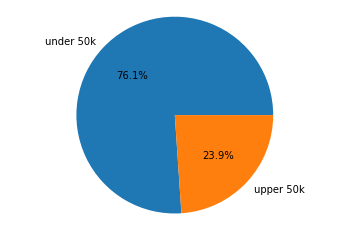

In [6]:
#Questions about adult dataset
print("What are the proportions of adults who earn income under 50k and upper 50k")
low_income = adult.loc[adult["income"] == '<=50K', "fnlwgt"].shape[0]
high_income = adult.loc[adult["income"] == '>50K', "fnlwgt"].shape[0]
incomes = [low_income, high_income]
label_income = ["under 50k", "upper 50k"]
plt.pie(incomes, labels = label_income, autopct='%1.1f%%')
plt.axis('equal')
print(low_income)
print(high_income)

In [7]:
fnlwgt_info_without_na = adult[adult["fnlwgt"].notna()]
fnlwgt_info_without_na.shape #fnlwgt information without na is same as entire dataset size -row number especially-
#we can use fnlwgt column feature without na risk

(48842, 15)

What are the proportions of adult who earn income under 50k and upper 50k based on marital-status


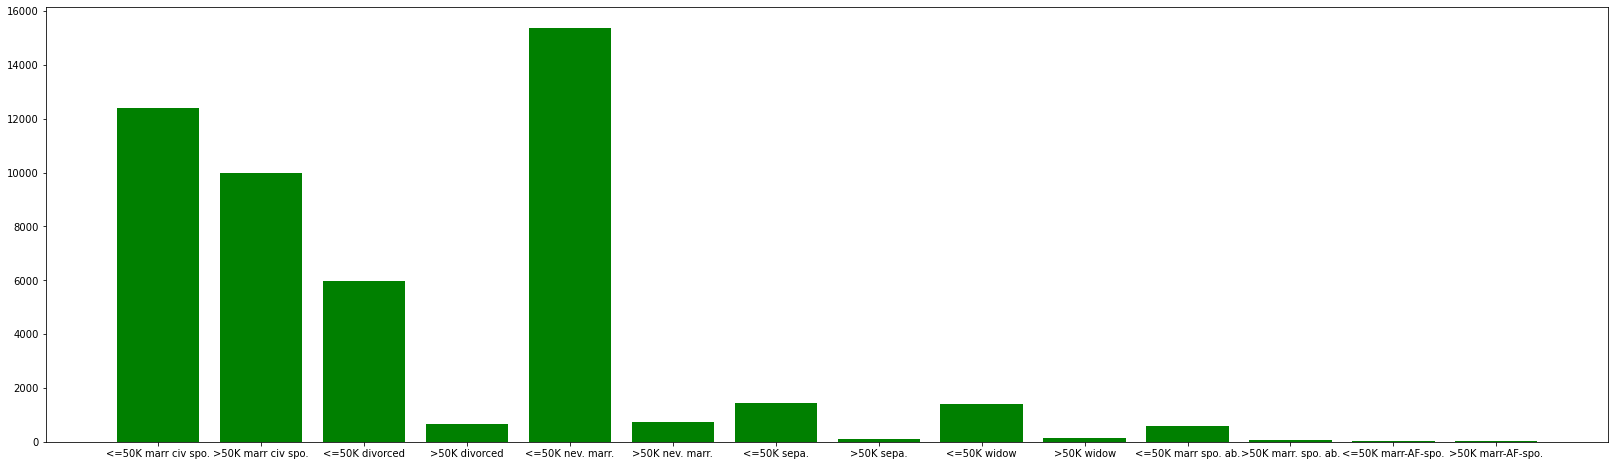

In [8]:
print("What are the proportions of adult who earn income under 50k and upper 50k based on marital-status")
under_50k_married_civ_spouse = adult[(adult["marital-status"] == "Married-civ-spouse") & (adult["income"] == '<=50K')].shape[0]
upper_50k_married_civ_spouse = adult[(adult["marital-status"] == "Married-civ-spouse") & (adult["income"] == '>50K')].shape[0]
under_50k_divorced = adult[(adult["marital-status"] == "Divorced") & (adult["income"] == '<=50K')].shape[0]
upper_50k_divorced = adult[(adult["marital-status"] == "Divorced") & (adult["income"]  == '>50K')].shape[0]
under_50k_never_marr = adult[(adult["marital-status"] == "Never-married") & (adult["income"] == '<=50K')].shape[0]
upper_50k_never_marr = adult[(adult["marital-status"] == "Never-married") & (adult["income"] == '>50K')].shape[0]
under_50k_sepa = adult[(adult["marital-status"] == "Separated") & (adult["income"] == '<=50K')].shape[0]
upper_50k_sepa = adult[(adult["marital-status"] == "Separated") & (adult["income"] == '>50K')].shape[0]
under_50k_widow = adult[(adult["marital-status"] == "Widowed") & (adult["income"] == '<=50K')].shape[0]
upper_50k_widow = adult[(adult["marital-status"] == "Widowed") & (adult["income"] == '>50K')].shape[0]
under_50k_mar_spo_ab = adult[(adult["marital-status"] == "Married-spouse-absent") & (adult["income"] == '<=50K')].shape[0]
upper_50k_mar_spo_ab = adult[(adult["marital-status"] == "Married-spouse-absent") & (adult["income"] == '>50K')].shape[0]
under_50k_mar_af = adult[(adult["marital-status"] == "Married-AF-spouse") & (adult["income"] == '<=50K')].shape[0]
upper_50k_mar_af = adult[(adult["marital-status"] == "Married-AF-spouse") & (adult["income"] == '>50K')].shape[0]
plt.figure(figsize = [28, 8])
df = [under_50k_married_civ_spouse, upper_50k_married_civ_spouse, under_50k_divorced, upper_50k_divorced, under_50k_never_marr, upper_50k_never_marr, under_50k_sepa, upper_50k_sepa, under_50k_widow, upper_50k_widow, under_50k_mar_spo_ab, upper_50k_mar_spo_ab, under_50k_mar_af, upper_50k_mar_af]
df_label = ["<=50K marr civ spo.", ">50K marr civ spo.", "<=50K divorced", ">50K divorced", "<=50K nev. marr.", ">50K nev. marr.", "<=50K sepa.", ">50K sepa.", "<=50K widow", ">50K widow", "<=50K marr spo. ab.", ">50K marr. spo. ab.", "<=50K marr-AF-spo.", ">50K marr-AF-spo."]
plt.bar(df_label, df, width=0.80, align= "center", color= "green")
plt.show()

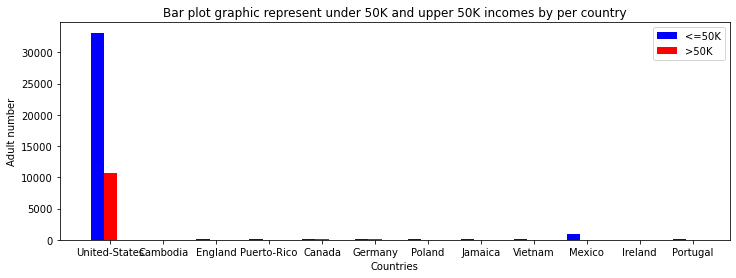

In [9]:
#countries
countries = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Ireland', 'Portugal']
under = [] #array data under 50K
upper = [] #array data upper 50K
for i in countries:
    under.append(adult[(adult["native-country"] == i) & (adult["income"] == '<=50K')].shape[0]) #create under data array
for i in countries:
    upper.append(adult[(adult["native-country"] == i) & (adult["income"] == '>50K')].shape[0]) #create upper data array
    
X = np.arange(len(under))

figure(figsize = (12,4))

plt.bar(X, under, color = 'blue', width=0.25)
plt.bar(X + 0.25, upper, color = 'red', width = 0.25)

plt.legend(['<=50K', '>50K'])

plt.xticks([i + 0.25 for i in range(12)], countries)
#naming title
plt.title("Bar plot graphic represent under 50K and upper 50K incomes by per country")
#naming x and y axis
plt.xlabel('Countries')
plt.ylabel('Adult number')

plt.savefig('bar_country.png')

plt.show()

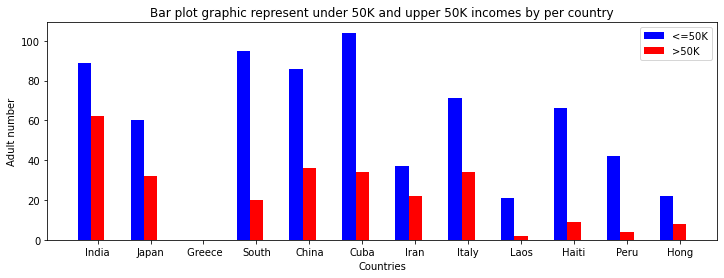

In [10]:
countries = ['India', 'Japan', ' Greece', 'South', 'China', 'Cuba', 'Iran', 'Italy', 'Laos', 'Haiti', 'Peru', 'Hong']
under = [] #array data under 50K
upper = [] #array data upper 50K
for i in countries:
    under.append(adult[(adult["native-country"] == i) & (adult["income"] == '<=50K')].shape[0]) #create under array
for i in countries:
    upper.append(adult[(adult["native-country"] == i) & (adult["income"] == '>50K')].shape[0]) #create upper array

X = np.arange(len(under))

figure(figsize=(12,4)) #arrange the size of the figure 

plt.bar(X, under, color = 'blue', width=0.25)
plt.bar(X + 0.25, upper, color = 'red', width=0.25)

plt.legend(['<=50K', '>50K'])

plt.xticks([i + 0.25 for i in range(12)], countries)

plt.title("Bar plot graphic represent under 50K and upper 50K incomes by per country")

plt.xlabel('Countries')
plt.ylabel('Adult number')

plt.show()

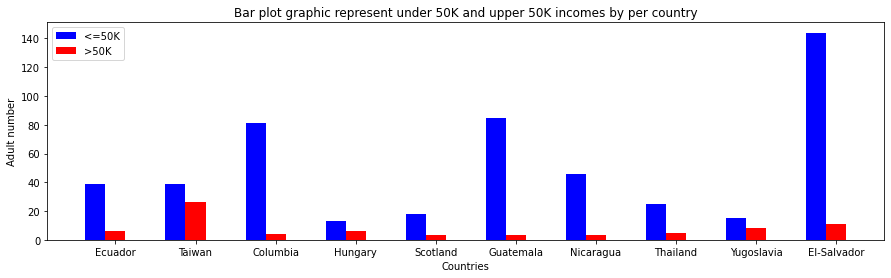

In [11]:
countries = ['Ecuador', 'Taiwan', 'Columbia', 'Hungary', 'Scotland', 'Guatemala', 'Nicaragua', 'Thailand', 'Yugoslavia', 'El-Salvador']
under = []
upper = []
for i in countries:
    under.append(adult[(adult["native-country"] == i) & (adult["income"] == '<=50K')].shape[0])
for i in countries:
    upper.append(adult[(adult["native-country"] == i) & (adult["income"] == '>50K')].shape[0])
    
X = np.arange(len(under))

figure(figsize = (15, 4))

plt.bar(X, under, color = 'blue', width =0.25)
plt.bar(X + 0.25, upper, color = 'red', width=0.25)

plt.legend(['<=50K', '>50K'])

plt.xticks([i + 0.25 for i in range(10)], countries)

plt.title("Bar plot graphic represent under 50K and upper 50K incomes by per country")

plt.xlabel('Countries')
plt.ylabel('Adult number')

plt.show()

Text(0, 0.5, 'Adult number')

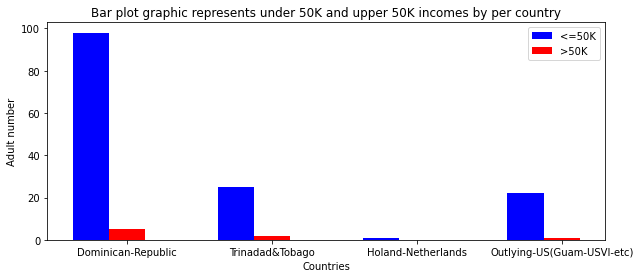

In [12]:
countries = ['Dominican-Republic', 'Trinadad&Tobago', 'Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']
under_count = []
upper_count = []
for i in countries:
    under_count.append(adult[(adult["native-country"] == i) & (adult["income"] == '<=50K')].shape[0])
for i in countries:
    upper_count.append(adult[(adult["native-country"] == i) & (adult["income"] == '>50K')].shape[0])
    
X = np.arange(len(under_count))

figure(figsize = (10, 4))

plt.bar(X, under_count, color = 'blue', width =0.25)
plt.bar(X + 0.25, upper_count, color = 'red', width=0.25)

plt.legend(['<=50K', '>50K'])

plt.xticks([i + 0.25 for i in range(4)], countries)

plt.title("Bar plot graphic represents under 50K and upper 50K incomes by per country")

plt.xlabel('Countries')
plt.ylabel('Adult number')

What are the proportions of adult who earn income under 50k and upper 50k based on race


Text(0, 0.5, 'Number of adults')

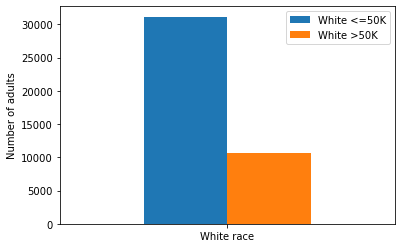

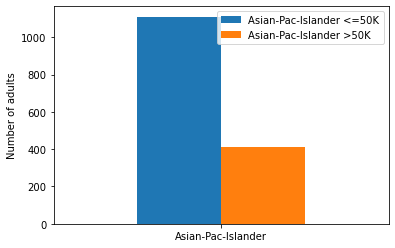

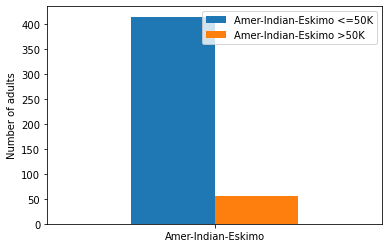

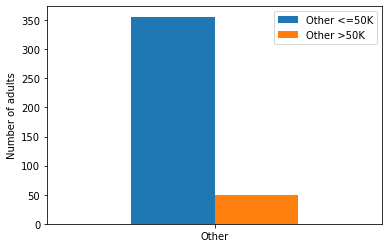

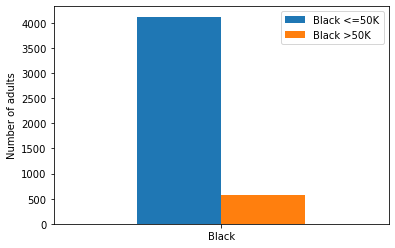

In [13]:
print("What are the proportions of adult who earn income under 50k and upper 50k based on race")
und_50k_white = adult[(adult["race"] == "White") & (adult["income"] == '<=50K')].shape[0]
up_50k_white = adult[(adult["race"] == "White") & (adult["income"] == '>50K')].shape[0]
index = ['White race']
df1 = pd.DataFrame({'White <=50K': und_50k_white, 'White >50K': up_50k_white}, index=index)
ax1 = df1.plot.bar(rot=0)
ax1.set_ylabel('Number of adults')

und_50k_asi = adult[(adult["race"] == "Asian-Pac-Islander") & (adult["income"] == '<=50K')].shape[0]
up_50k_asi = adult[(adult["race"] == "Asian-Pac-Islander") & (adult["income"] == '>50K')].shape[0]
index2 = ['Asian-Pac-Islander']
df2 = pd.DataFrame({'Asian-Pac-Islander <=50K': und_50k_asi, 'Asian-Pac-Islander >50K': up_50k_asi}, index=index2)
ax2 = df2.plot.bar(rot=0)
ax2.set_ylabel('Number of adults')

und_50k_amo = adult[(adult["race"] == "Amer-Indian-Eskimo") & (adult["income"] == '<=50K')].shape[0]
up_50k_amo = adult[(adult["race"] == "Amer-Indian-Eskimo") & (adult["income"] == '>50K')].shape[0]
index3 = ["Amer-Indian-Eskimo"]
df3 = pd.DataFrame({'Amer-Indian-Eskimo <=50K': und_50k_amo, 'Amer-Indian-Eskimo >50K': up_50k_amo}, index=index3)
ax3 = df3.plot.bar(rot=0)
ax3.set_ylabel('Number of adults')

und_50k_oth = adult[(adult["race"] == "Other") & (adult["income"] == '<=50K')].shape[0]
up_50k_oth = adult[(adult["race"] == "Other") & (adult["income"] == '>50K')].shape[0]
index4 = ['Other']
df4 = pd.DataFrame({'Other <=50K': und_50k_oth, 'Other >50K': up_50k_oth}, index=index4)
ax4 = df4.plot.bar(rot=0)
ax4.set_ylabel('Number of adults')

und_50k_black = adult[(adult["race"] == "Black") & (adult["income"] == '<=50K')].shape[0]
up_50k_black = adult[(adult["race"] == "Black") & (adult["income"]  == '>50K')].shape[0]
index5 = ['Black']
df5 = pd.DataFrame({'Black <=50K': und_50k_black, 'Black >50K':up_50k_black}, index=index5)
ax5 = df5.plot.bar(rot=0)
ax5.set_ylabel('Number of adults')

What are proportions of adult who earn income under 50 and upper 50 based on gender


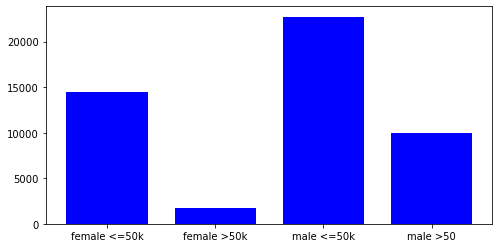

In [14]:
print("What are proportions of adult who earn income under 50 and upper 50 based on gender")
female_under_50k = adult[(adult["gender"] == "Female") & (adult["income"] == '<=50K')].shape[0]
female_up_50k = adult[(adult["gender"] == "Female") & (adult["income"] == '>50K')].shape[0]
male_und_50k = adult[(adult["gender"] == "Male") & (adult["income"] == '<=50K')].shape[0]
male_up_50k = adult[(adult["gender"] == "Male") & (adult["income"] == '>50K')].shape[0]
plt.figure(figsize = [8, 4])
genders = [female_under_50k, female_up_50k, male_und_50k, male_up_50k]
labels = ["female <=50k", "female >50k", "male <=50k", "male >50"]
plt.bar(labels, genders, width = 0.75, align= 'center', color="blue")
plt.show()

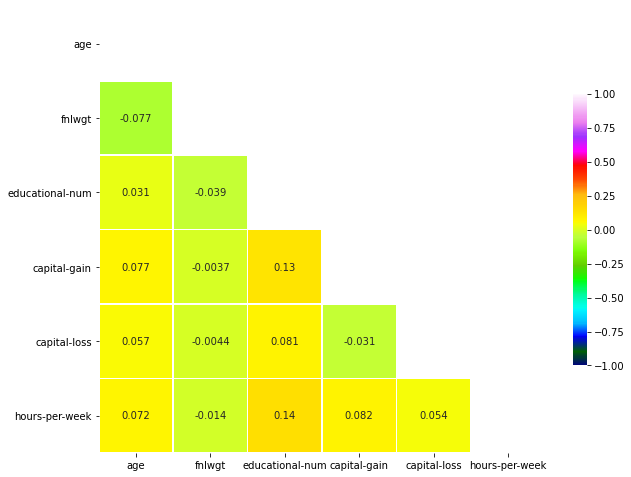

In [15]:
#corralation matrix
corrMatrix = adult.corr()
mask = np.triu(np.ones_like(corrMatrix))
f,ax=plt.subplots(figsize=(10,10)) 
 
sns.heatmap(corrMatrix, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, cmap= 'gist_ncar') 
plt.show()

In [16]:
#Missing value handling
convert = ["?"],[np.nan]
adult=adult.replace(convert[0],convert[1])

adult.dropna(inplace=True)
adult.reset_index(inplace = True, drop = True)
adult.info()
adult

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
#objects values convert to int function
def convert_data(df):
    for column in df.columns:
        if((df[column].dtypes == "object")&(column != "income")):
            convert = df[column].unique()
            x = []
            for k in range(len(convert)):
                x.append(k/(len(convert)))#Normalizing the values
            for i in convert:
                df = df.replace(convert,x)
    return df

adult = convert_data(adult)
adult


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0.000000,226802,0.0000,7,0.000000,0.000000,0.000000,0.0,0.0,0,0,40,0.0,<=50K
1,38,0.000000,89814,0.0625,9,0.142857,0.071429,0.166667,0.2,0.0,0,0,50,0.0,<=50K
2,28,0.142857,336951,0.1250,12,0.142857,0.142857,0.166667,0.2,0.0,0,0,40,0.0,>50K
3,44,0.000000,160323,0.1875,10,0.142857,0.000000,0.166667,0.0,0.0,7688,0,40,0.0,>50K
4,34,0.000000,198693,0.2500,6,0.000000,0.214286,0.333333,0.2,0.0,0,0,30,0.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,0.000000,257302,0.1250,12,0.142857,0.571429,0.666667,0.2,0.5,0,0,38,0.0,<=50K
45218,40,0.000000,154374,0.0625,9,0.142857,0.000000,0.166667,0.2,0.0,0,0,40,0.0,>50K
45219,58,0.000000,151910,0.0625,9,0.285714,0.428571,0.500000,0.2,0.5,0,0,40,0.0,<=50K
45220,22,0.000000,201490,0.0625,9,0.000000,0.428571,0.000000,0.2,0.0,0,0,20,0.0,<=50K


In [18]:
adult.dtypes

age                  int64
workclass          float64
fnlwgt               int64
education          float64
educational-num      int64
marital-status     float64
occupation         float64
relationship       float64
race               float64
gender             float64
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country     float64
income              object
dtype: object

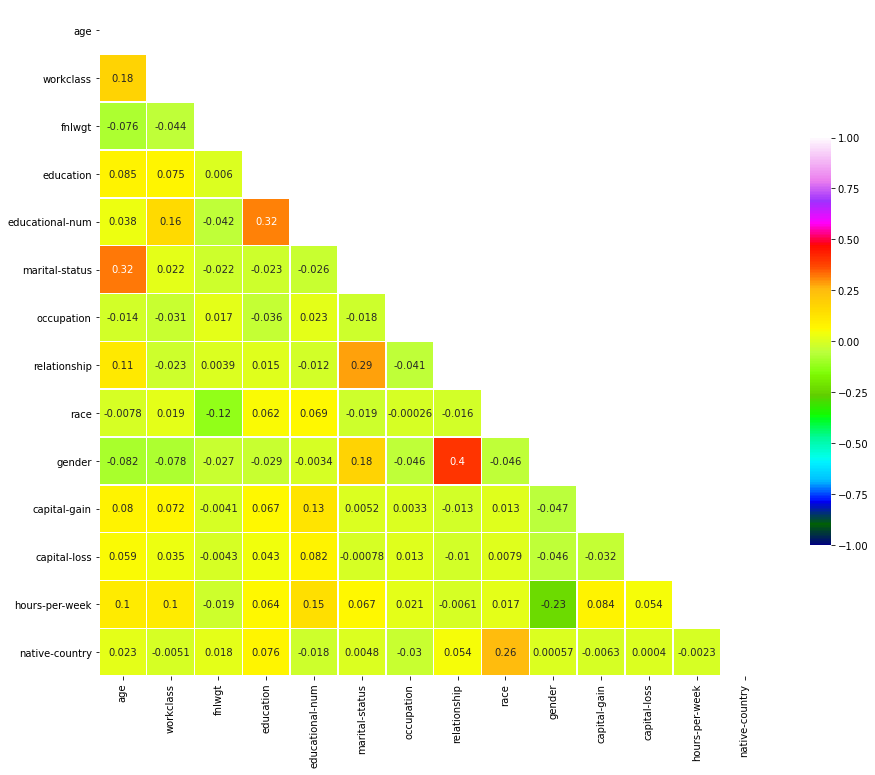

In [19]:
#correlation matrix plotting after converting data to int
corrMatrix_con = adult.corr()
mask = np.triu(np.ones_like(corrMatrix_con))
f,ax=plt.subplots(figsize=(15,15)) 
 
sns.heatmap(corrMatrix_con, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, cmap= 'gist_ncar') 
plt.show()

In [20]:
#PCA 2D and 3D visualization

#Standadizing data for PCA
features = ["age","workclass","fnlwgt","education","educational-num",
            "marital-status","occupation","relationship","race","gender",
            "capital-gain","capital-loss","hours-per-week","native-country"]

#Separating out the features
x = adult.loc[:,features].values

#Separating out the income
y = adult.loc[:,["income"]].values

#Standardizing the features
x = StandardScaler().fit_transform(x)

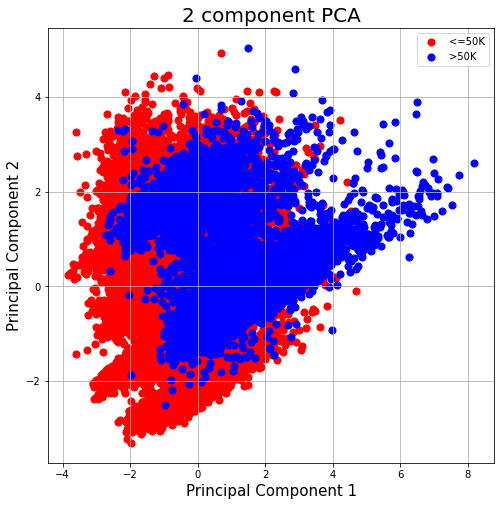

In [21]:
#PCA Projection to 2D
pca = PCA(n_components = 2)
princibalComponents = pca.fit_transform(x)
princibalDF = pd.DataFrame(data = princibalComponents, columns = ['principal component 1', 'principal component 2'])
finaldf = pd.concat([princibalDF, adult[['income']]], axis = 1)

#Visualize 3D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ["<=50K",">50K"]
colors = ["red","blue"]
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['income'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

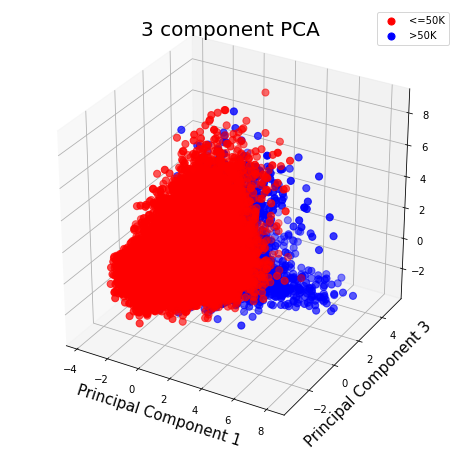

In [22]:
#PCA Projection to 3D
pca = PCA(n_components = 3)
princibalComponents = pca.fit_transform(x)
princibalDF = pd.DataFrame(data = princibalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finaldf = pd.concat([princibalDF, adult[['income']]], axis = 1)

#Visualize 3D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = "3d") 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ["<=50K",">50K"]
colors = ["red","blue"]
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['income'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               ,finaldf.loc[indicesToKeep, 'principal component 3'] 
               ,c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
#gender based classification

sex_data = adult[["gender", "income"]] #we create data set block includes only gender and income
sex_data.head()

,gender,income
0,0.0,<=50K
1,0.0,<=50K
2,0.0,>50K
3,0.0,>50K
4,0.0,<=50K


In [79]:
#split data set %70 train and %30 test
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(sex_data.gender, sex_data.income, test_size=0.3, random_state = 30) 


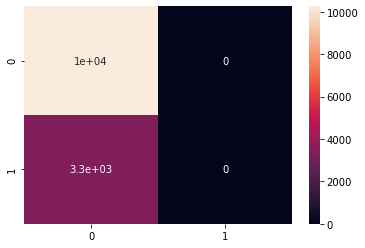

In [82]:
#Desicion Tree Algorithm
clf = DecisionTreeClassifier(max_depth = 2) #set depth of tree 
clf.fit(X_train_gender.values.reshape(-1,1), y_train_gender)
clf_pred = clf.predict(X_test_gender.values.reshape(-1,1))

conf = confusion_matrix(y_test_gender,clf_pred)

sns.heatmap(conf, annot=True)

In [83]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_gender,clf_pred))

Accuracy Score:  0.7558045256873296


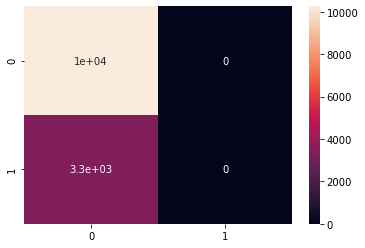

In [84]:
#Naive Bayes Algorithm
clf_nb = GaussianNB()
clf_nb.fit(X_train_gender.values.reshape(-1,1), y_train_gender)
clf_nb_pred = clf_nb.predict(X_test_gender.values.reshape(-1,1))

conf_nb = confusion_matrix(y_test_gender,clf_nb_pred)
sns.heatmap(conf_nb, annot=True)

In [85]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_gender,clf_nb_pred))

Accuracy Score:  0.7558045256873296


In [86]:
#race based classification

#income = {'<=50K': 2, '>50K' : 3}
#adult.income = [income[item] for item in adult.income]
race_data = adult[["race", "income"]]
race_data.head()

,race,income
0,0.0,<=50K
1,0.2,<=50K
2,0.2,>50K
3,0.0,>50K
4,0.2,<=50K


In [87]:
X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(race_data.race, race_data.income, random_state=30, test_size=0.3)


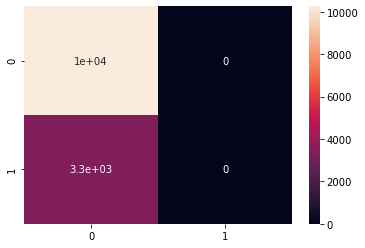

In [88]:
#Desicion Tree Algorithm
clf2 = DecisionTreeClassifier(max_depth = 5, random_state = 0) #with max_depth overfitting is avoided
clf2.fit(X_train_race.values.reshape(-1,1), y_train_race)
clf2_pred = clf2.predict(X_test_race.values.reshape(-1,1)) #reshape as numpy array matrix

conf2 = confusion_matrix(y_test_race,clf2_pred)

sns.heatmap(conf2, annot=True)

In [89]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_race,clf2_pred))

Accuracy Score:  0.7558045256873296


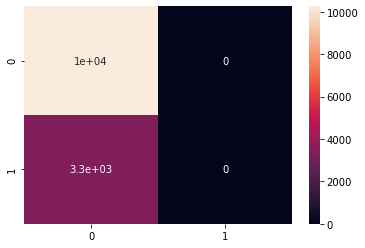

In [90]:
#Naive Bayes Algorithm
clf2_nb = GaussianNB()
clf2_nb.fit(X_train_race.values.reshape(-1,1), y_train_race)
clf2_nb_pred = clf2_nb.predict(X_test_race.values.reshape(-1,1))

conf2_nb = confusion_matrix(y_test_race,clf2_nb_pred)
sns.heatmap(conf2_nb, annot=True)

In [91]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_race,clf2_nb_pred))

Accuracy Score:  0.7558045256873296


In [92]:
#marital status based classification

marital_data = adult[["marital-status","income"]]
marital_data.head()

,marital-status,income
0,0.000000,<=50K
1,0.142857,<=50K
2,0.142857,>50K
3,0.142857,>50K
4,0.000000,<=50K


In [93]:
X_train_mari, X_test_mari, y_train_mari, y_test_mari = train_test_split(marital_data["marital-status"], marital_data["income"], random_state=30,test_size=0.3)

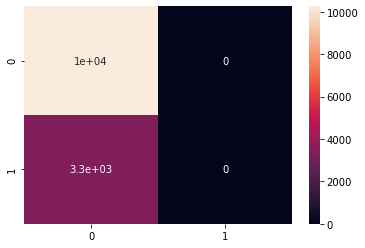

In [94]:
#Desicion Tree Algorithm
clf3 = DecisionTreeClassifier(max_depth = 2, random_state = 0) #with max depth overfitting is avoided
clf3.fit(X_train_mari.values.reshape(-1,1), y_train_mari) #fitting X train values to theirs y train labels 
clf3_pred = clf3.predict(X_test_mari.values.reshape(-1,1)) #reshape as numpy array matrix

conf3 = confusion_matrix(y_test_mari,clf3_pred)

sns.heatmap(conf3, annot=True)

In [95]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_mari,clf3_pred))

Accuracy Score:  0.7558045256873296


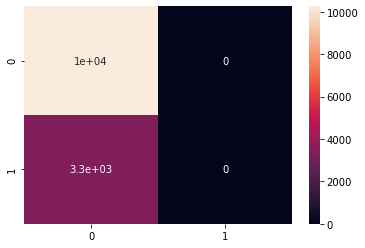

In [96]:
#Naive Bayes Algorithm
clf3_nb = GaussianNB()
clf3_nb.fit(X_train_mari.values.reshape(-1,1), y_train_mari)
clf3_nb_pred = clf3_nb.predict(X_test_mari.values.reshape(-1,1))

conf3_nb = confusion_matrix(y_test_mari,clf3_nb_pred)
sns.heatmap(conf3_nb, annot=True)

In [97]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_mari,clf3_nb_pred))

Accuracy Score:  0.7558045256873296


In [98]:
#native country based classification

native_data = adult[["native-country", "income"]]
native_data.head()

,native-country,income
0,0.0,<=50K
1,0.0,<=50K
2,0.0,>50K
3,0.0,>50K
4,0.0,<=50K


In [99]:
X_train_nati, X_test_nati, y_train_nati, y_test_nati = train_test_split(native_data["native-country"], native_data["income"], random_state=30,test_size = 0.3)

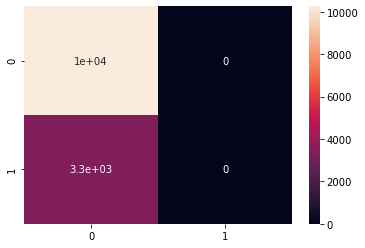

In [100]:
#Desicion Tree Algorithm
clf4 = DecisionTreeClassifier(max_depth = 2, random_state=0)
clf4.fit(X_train_nati.values.reshape(-1,1), y_train_nati)
clf4_pred = clf4.predict(X_test_nati.values.reshape(-1,1))

conf4 = confusion_matrix(y_test_nati,clf4_pred)

sns.heatmap(conf4, annot=True)

In [101]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_nati,clf4_pred))

Accuracy Score:  0.7558045256873296


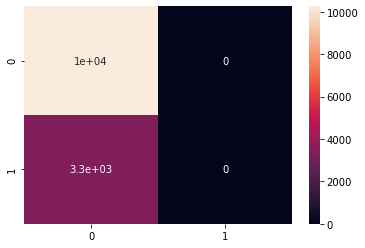

In [102]:
#Naive Bayes Algorithm
clf4_nb = GaussianNB()
clf4_nb.fit(X_train_nati.values.reshape(-1,1), y_train_nati)
clf4_nb_pred = clf4_nb.predict(X_test_nati.values.reshape(-1,1))

conf4_nb = confusion_matrix(y_test_nati,clf4_nb_pred)
sns.heatmap(conf4_nb, annot=True)

In [103]:
#Accuracy Score
print("Accuracy Score: ",metrics.accuracy_score(y_test_nati,clf4_nb_pred))

Accuracy Score:  0.7558045256873296


In [104]:
#Separation for data as features and income
X = adult.iloc[:,0:14]
Y = adult.iloc[:,14:15]

#Separating data as train and test
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


In [108]:
#Decision Tree Algorithm
dtc = DecisionTreeClassifier(max_depth = 12, criterion="entropy", 
                             max_features = 10)
dtc.fit(X_train, Y_train)
dtc_pred = dtc.predict(x_test)


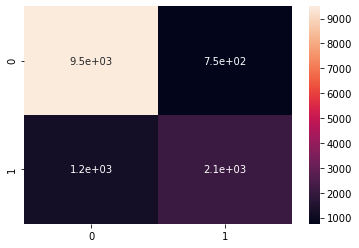

In [109]:
conf_dtc = confusion_matrix(y_test,dtc_pred)
sns.heatmap(conf_dtc, annot=True)

In [110]:
#Accuracy Score
print("Decision Tree Accuracy Score: ",metrics.accuracy_score(y_test,dtc_pred))


Decision Tree Accuracy Score:  0.8540576398614285


C:\Users\kate_\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


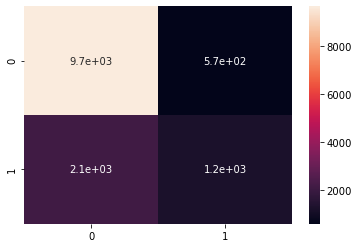

In [111]:
#Naive Bayes Algorithm
nb = GaussianNB(var_smoothing = 1e-30)
nb.fit(X_train, Y_train)
nb_pred = nb.predict(x_test)

conf_nb = confusion_matrix(y_test,nb_pred)
sns.heatmap(conf_nb, annot=True)

In [112]:
#Accuracy Score
print("Naive Bayes Accuracy Score: ",metrics.accuracy_score(y_test,nb_pred))

Naive Bayes Accuracy Score:  0.8027566890248397


<ipython-input-113-375723640e8c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


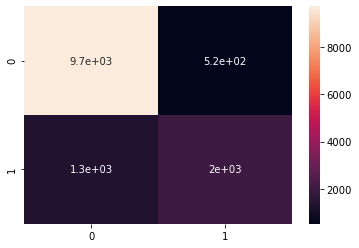

In [113]:
#Random Forest Algorithm
rf = RandomForestClassifier(n_estimators = 250,max_depth=15)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(x_test)

conf_rf = confusion_matrix(y_test,rf_pred)
sns.heatmap(conf_rf, annot=True)

In [114]:
#Accuracy Score
print("Random Forest Accuracy Score: ",metrics.accuracy_score(y_test,rf_pred))

Random Forest Accuracy Score:  0.8639345470627258
